# 01-04 Statistical analysis of time series

In [1]:
# Global statistics: mean, meadian, std, sum, etc..
# rolling statistics: rolling_mean, rolling_std, etc..
# Bollinger Bands - how far stock price has deviated from some norm
# Daily Returns

import pandas as pd
from DataHelper import DataHelper
import matplotlib.pyplot as plt

In [2]:
df = DataHelper.GetPriceHistory(['AAPL', 'IBM'], '2001-01-01', '2007-01-01')

In [3]:
# global stats
print(df.mean())
print(df.std())
print(df.max())
print(df.min())

SPY     96.589529
AAPL    27.266709
IBM     78.269409
dtype: float64
SPY     13.611399
AAPL    24.283347
IBM     10.205161
dtype: float64
SPY     127.59
AAPL     91.42
IBM     108.71
dtype: float64
SPY     64.82
AAPL     6.53
IBM     47.93
dtype: float64


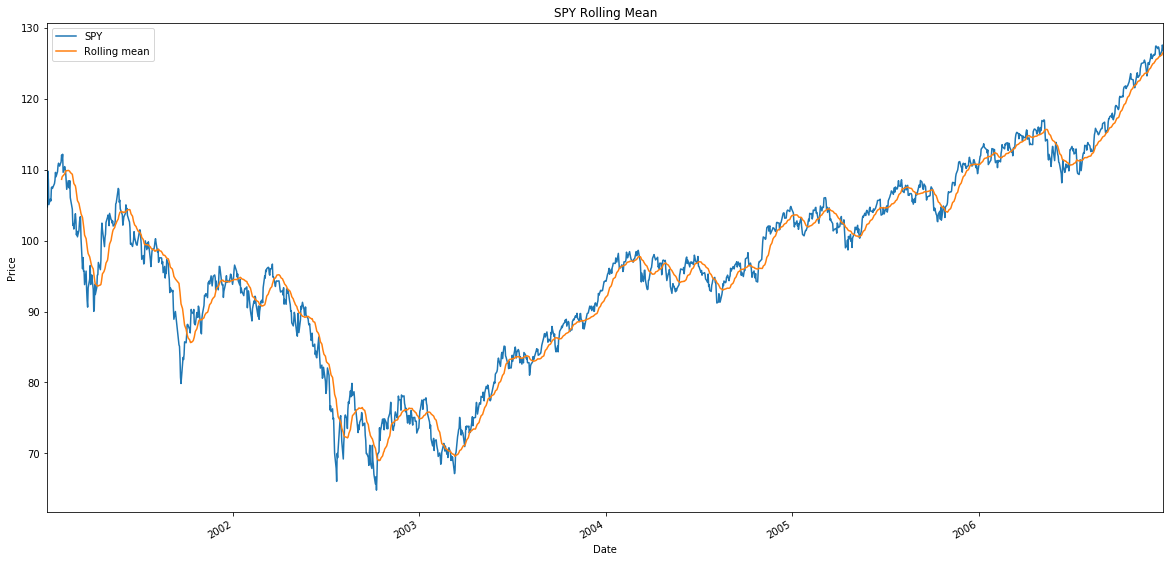

In [4]:
plt.figure(figsize=(20,10))
rolling_mean_SPY = df['SPY'].rolling(window=20).mean()
ax = df['SPY'].plot(title='SPY Rolling Mean', label='SPY')
ax = rolling_mean_SPY.plot(label='Rolling mean')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

plt.show()


### Bollinger Bands

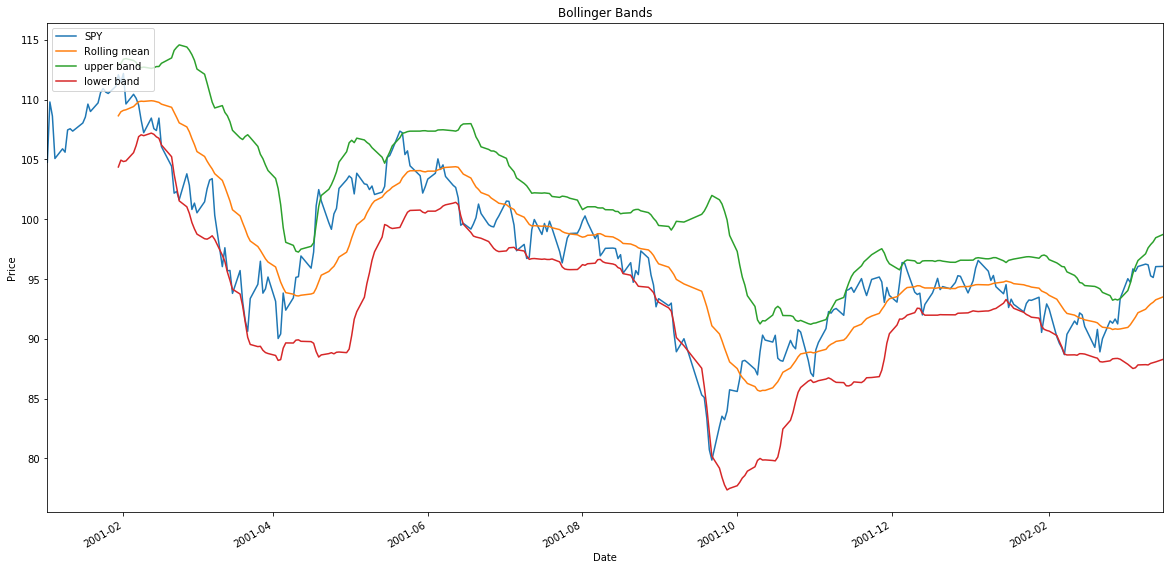

In [5]:
# bollinger bands, 2 Standard deviations above or below the mean, should pay attention
def get_rolling_mean(values, window):
    return values.rolling(window=window).mean()

def get_rolling_std(values, window):
    return values.rolling(window=window).std()

def get_bollinger_bands(rm, rstd):
    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd
    return upper_band, lower_band

def plot_bollinger_bands(data):
    plt.figure(figsize=(20,10))
    rm = get_rolling_mean(data, 20)
    rstd = get_rolling_std(data, 20)
    ub, lb = get_bollinger_bands(rm, rstd)
    
    # Plot raw values, rolling mean and Bollinger Bands
    ax = data.plot(title="Bollinger Bands", label='SPY')
    rm.plot(label='Rolling mean', ax=ax)
    ub.plot(label='upper band', ax=ax)
    lb.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
plot_bollinger_bands(df['SPY'].head(300))

# look into bollinger "gaps", when it gets really volatile and rolling standard deviation is bigger than "normal"

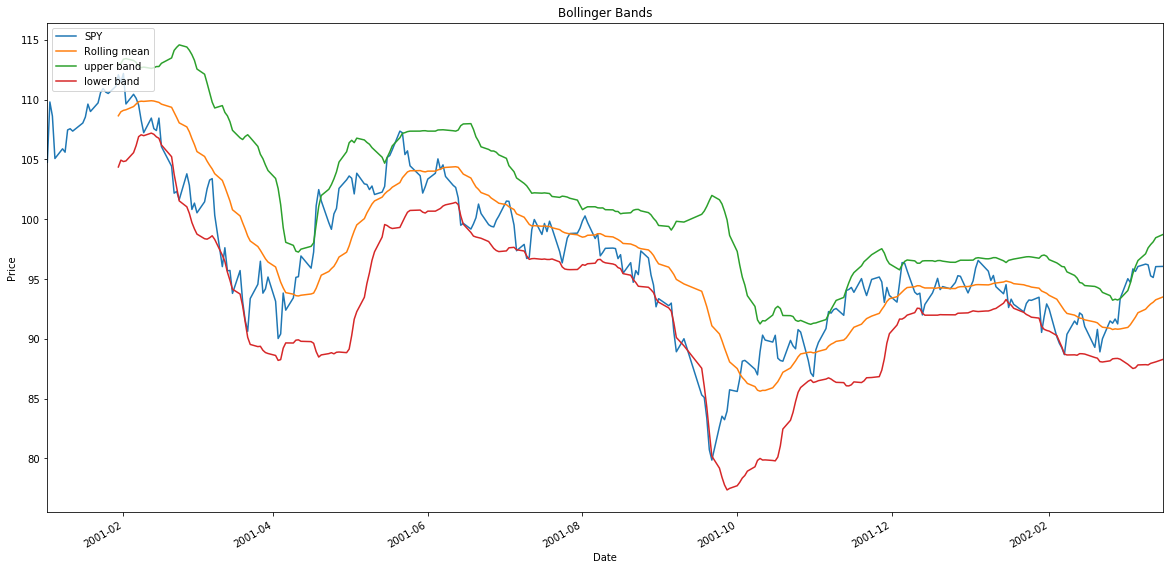

In [6]:
# added above methods to DataHelper
DataHelper.plot_bollinger_bands(df['SPY'].head(300))

### Daily Returns

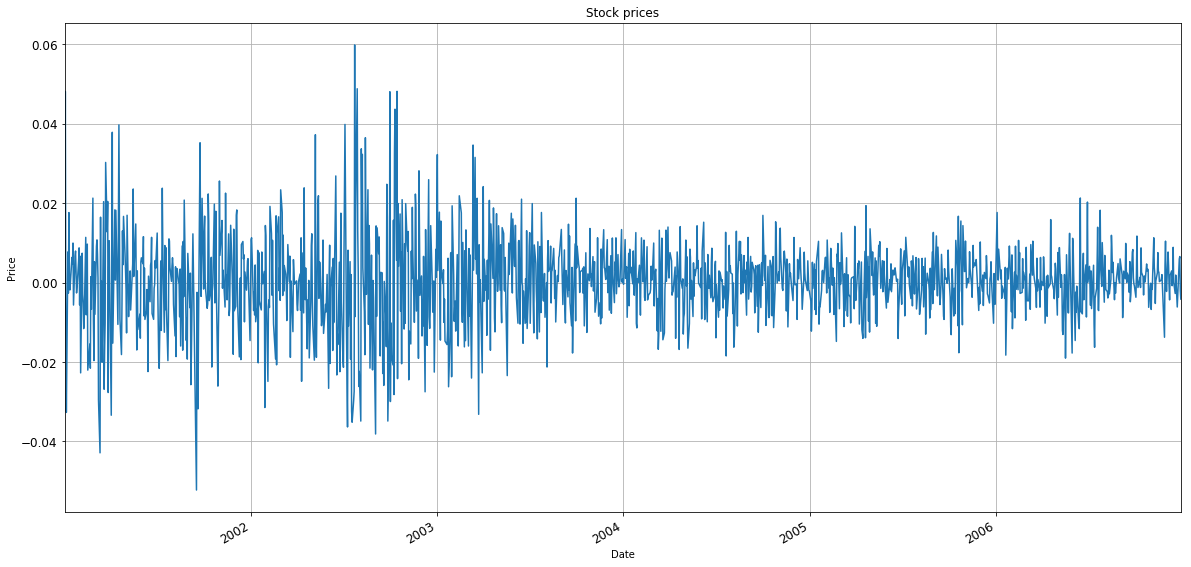

In [7]:
# daily returns, how much price went up/down each day
# daily_return[t] = (price[t]/price[t-1]) - 1
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    return ((df / df.shift(1)) - 1).fillna(0)

daily = compute_daily_returns(df['SPY'])
DataHelper.plot_data(daily)

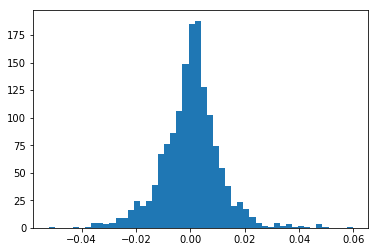

In [19]:
plt.hist(daily, bins=50)
plt.show()

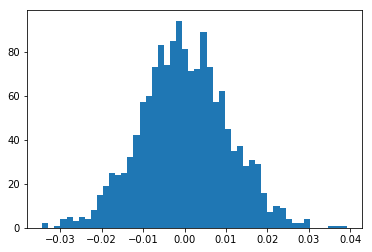

In [27]:
import numpy as np
plt.hist(np.random.normal(daily.mean(), daily.std(), daily.count()), bins=50)
plt.show()
# not a normal distribution

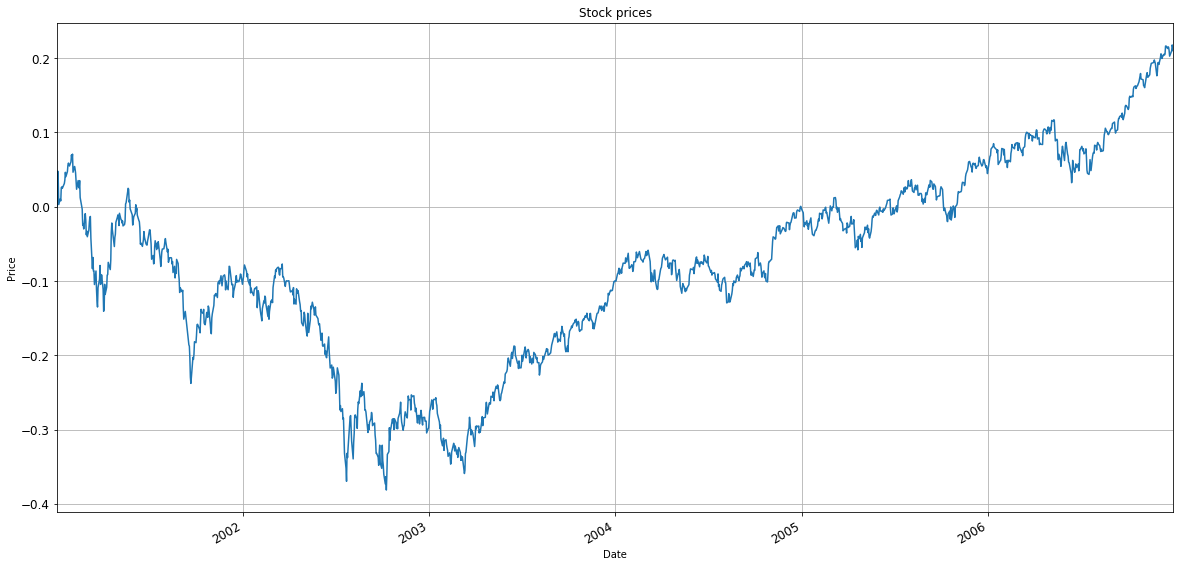

In [28]:
def compute_cumulative_returns(df):
        return ((df / df[0]) - 1)
    
cumulative = compute_cumulative_returns(df['SPY'])
DataHelper.plot_data(cumulative)